In [161]:
!unzip archive.zip


Archive:  archive.zip
replace Testing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Import necessary libraries**

In [176]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


**Load the training and testing datasets from CSV files**

In [187]:
train = pd.read_csv('Training.csv')


In [188]:
test = pd.read_csv('Testing.csv')

In [190]:
train = train.iloc[:, :-1]

In [191]:
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [228]:
train_features = train.iloc[:, :-1].values
train_labels = train.iloc[:, -1].values

test_features = test.iloc[:, :-1].values
test_labels = test.iloc[:, -1].values

In [229]:
train_features = pd.DataFrame(train_features)
train_features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:

train_labels = pd.DataFrame(train_labels)
train_labels.head(5)

,0
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [231]:
test_features = pd.DataFrame(test_features)
test_features.head(5)

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:

test_labels = pd.DataFrame(test_labels)
test_labels.head(5)

,0
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction


In [233]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_labels = encoder.fit_transform(train.iloc[:, -1])
test_labels = encoder.transform(test.iloc[:, -1])

In [234]:
train_labels = pd.DataFrame(train_labels)
train_labels.head(5)

,0
0,15
1,15
2,15
3,15
4,15


In [235]:
test_labels = pd.DataFrame(test_labels)
test_labels.head(5)

,0
0,15
1,4
2,16
3,9
4,14


In [236]:
from numpy import ravel

test_labels = ravel(test_labels)
train_labels = ravel(train_labels)

**Gaussian Naive Bayes**

In [222]:
classifier = GaussianNB()



In [237]:
classifier.fit(train_features, train_labels)


GaussianNB()

In [238]:
y_pred_nb = classifier.predict(test_features)




**Generate confusion matrix plot for Gaussian Naive Bayes classifier**

Text(0.5, 1.0, 'Confusion Matrix for Gaussian Naive Bayes')

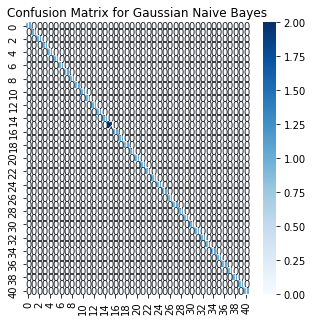

In [240]:
cm = confusion_matrix(test_labels, y_pred_nb)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Gaussian Naive Bayes")

**Calculate accuracy, precision, recall, and F1 score for Gaussian Naive Bayes classifier**

In [241]:
accuracy_nb = accuracy_score(test_labels, y_pred_nb)
precision_nb = precision_score(test_labels, y_pred_nb, average='weighted')
recall_nb = recall_score(test_labels, y_pred_nb, average='weighted')
f1_nb = f1_score(test_labels, y_pred_nb, average='weighted')



**Print evaluation metrics for Gaussian Naive Bayes classifier**

In [242]:
print("Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", f1_nb)





Accuracy: 1.0
Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1 Score: 1.0


**SVM**

In [ ]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'linear')

In [243]:
SVM.fit(train_features, train_labels)

SVC(kernel='linear')

In [245]:
y_pred_svm = SVM.predict(test_features)

**Generate confusion matrix plot for SVM classifier**

Text(0.5, 1.0, 'Confusion Matrix for SVM')

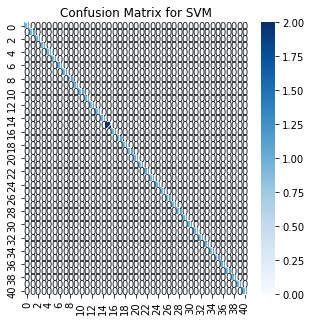

In [246]:
cm = confusion_matrix(test_labels, y_pred_svm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix for SVM")

**Calculate accuracy, precision, recall, and F1 score for SVM classifier**

In [247]:
accuracy_svm = accuracy_score(test_labels,y_pred_svm)
precision_svm = precision_score(test_labels,y_pred_svm, average='weighted')
recall_svm = recall_score(test_labels, y_pred_svm, average='weighted')
f1_svm = f1_score(test_labels, y_pred_svm, average='weighted')

print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)


print("SVM Accuracy : ", accuracy_svm)

SVM Precision: 1.0
SVM Recall: 1.0
SVM F1 Score: 1.0
SVM Accuracy :  1.0


**Logistic Regression**

In [248]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression()

In [249]:
classifier_lr.fit(train_features, train_labels)

LogisticRegression()

In [250]:
y_pred_lr = classifier_lr.predict(test_features)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

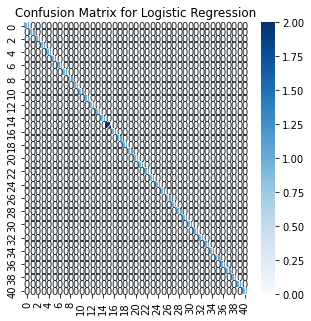

In [251]:
cm = confusion_matrix(test_labels, y_pred_lr)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")

**Calculate accuracy, precision, recall, and F1 score for Logistic Regression classifier**

In [252]:
accuracy_lr = accuracy_score(test_labels, y_pred_lr)
precision_lr = precision_score(test_labels, y_pred_lr, average='weighted')
recall_lr = recall_score(test_labels, y_pred_lr, average='weighted')
f1_lr = f1_score(test_labels, y_pred_lr, average='weighted')




In [253]:
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1 Score:", f1_lr)



Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Logistic Regression F1 Score: 1.0


**Decision Tree**

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
clf = DecisionTreeClassifier()
clf.fit(train_features, train_labels)

DecisionTreeClassifier()

In [257]:
y_pred_dt = clf.predict(test_features)

**Generate confusion matrix plot for Decision Tree**

Text(0.5, 1.0, 'Confusion Matrix for Desicion Tree')

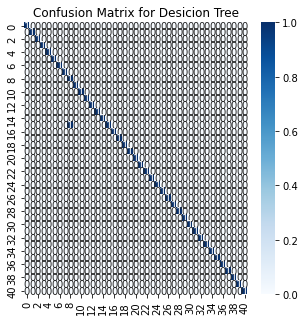

In [258]:
cm = confusion_matrix(test_labels, y_pred_dt)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Desicion Tree")

**Calculate accuracy, precision, recall, and F1 score for Decision Tree**

In [259]:
accuracy_dt = accuracy_score(test_labels, y_pred_dt)
precision_dt = precision_score(test_labels, y_pred_dt, average='weighted')
recall_dt = recall_score(test_labels, y_pred_dt, average='weighted')
f1_dt = f1_score(test_labels, y_pred_dt, average='weighted')


In [260]:
print("decision tree Accuracy:", accuracy_dt)
print("decision tree precision:", precision_dt)
print("decision tree recall score:", recall_dt)
print("decision tree F1 Score:", f1_dt)





decision tree Accuracy: 0.9761904761904762
decision tree precision: 0.9880952380952381
decision tree recall score: 0.9761904761904762
decision tree F1 Score: 0.9761904761904762


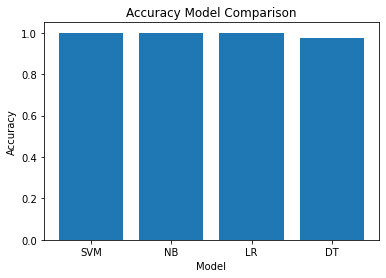

In [261]:
names = ['SVM', 'NB', 'LR',  'DT']
scores = [accuracy_svm, accuracy_nb, accuracy_lr, accuracy_dt]

plt.bar(names, scores)
plt.title("Accuracy Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()